🎵 Đang xử lý: [MConverter.eu] alb_se4.wav
🎵 Đang xử lý: [MConverter.eu] alb_se5.wav
🎵 Đang xử lý: [MConverter.eu] alb_se6.wav
🎵 Đang xử lý: [MConverter.eu] alb_se7.wav
🎵 Đang xử lý: [MConverter.eu] alb_se8.wav
🎵 Đang xử lý: 1000 Handz - Twinways.wav
🎵 Đang xử lý: coolkid - wobbling.wav
🎵 Đang xử lý: LowLevA - Fernweh.wav
🎵 Đang xử lý: Soularflair - NEMESIS (dark dance, deep, brooding, menacing).wav
🎵 Đang xử lý: Viscid - B.wav


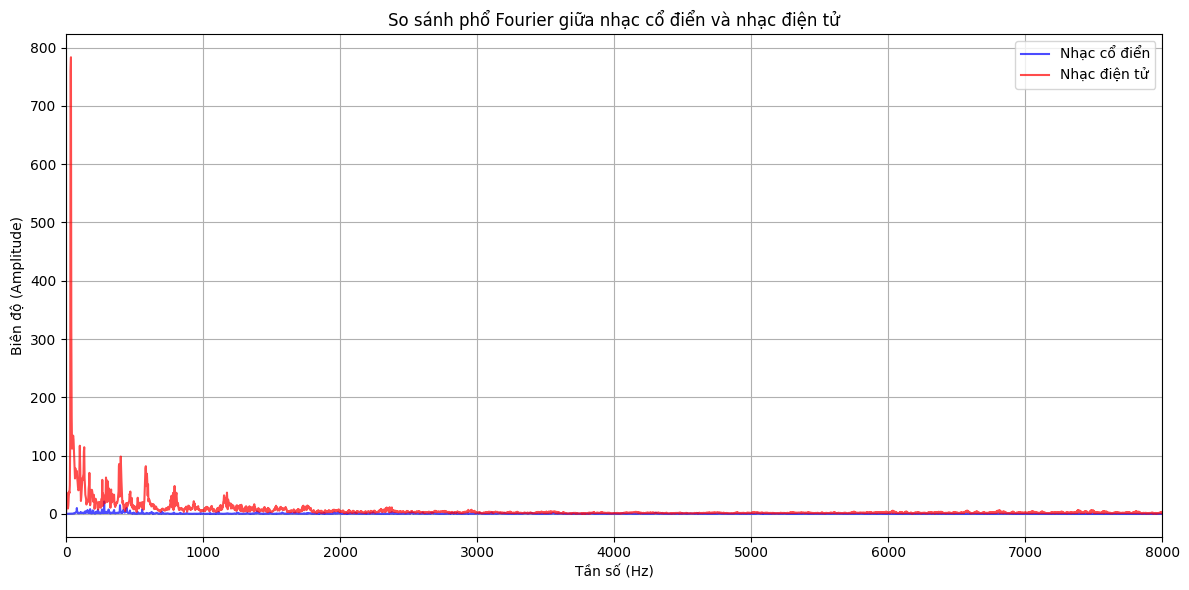

In [6]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# ====== Hàm tính FFT với chuẩn hóa độ dài ======
def compute_fft(audio, sr, target_len=2**14):
    if len(audio) < target_len:
        audio = np.pad(audio, (0, target_len - len(audio)))  # Bổ sung 0 nếu ngắn
    else:
        audio = audio[:target_len]  # Cắt nếu quá dài
    N = len(audio)
    yf = fft(audio)
    xf = fftfreq(N, 1 / sr)
    return xf[:N // 2], np.abs(yf[:N // 2])  # Chỉ lấy phần dương

# ====== Phân tích nhiều file của một thể loại ======
def analyze_files(file_paths):
    all_spectra = []
    xf = None

    for path in file_paths:
        print(f"🎵 Đang xử lý: {path}")
        audio, sr = librosa.load(path, sr=None, mono=True)
        xf, yf = compute_fft(audio, sr)
        all_spectra.append(yf)

    all_spectra = np.vstack(all_spectra)  # Dạng (num_files, N)
    avg_yf = np.mean(all_spectra, axis=0)
    return xf, avg_yf

# ====== Cập nhật đường dẫn đến các file của bạn ======
classical_files = [
    '[MConverter.eu] alb_se4.wav',
    '[MConverter.eu] alb_se5.wav',
    '[MConverter.eu] alb_se6.wav',
    '[MConverter.eu] alb_se7.wav',
    '[MConverter.eu] alb_se8.wav'
]
electronic_files = [
    '1000 Handz - Twinways.wav',
    'coolkid - wobbling.wav',
    'LowLevA - Fernweh.wav',
    'Soularflair - NEMESIS (dark dance, deep, brooding, menacing).wav',
    'Viscid - B.wav'
]

# ====== Phân tích phổ ======
xf_classical, yf_classical = analyze_files(classical_files)
xf_electronic, yf_electronic = analyze_files(electronic_files)

# ====== Vẽ phổ ======
plt.figure(figsize=(12, 6))
plt.plot(xf_classical, yf_classical, label='Nhạc cổ điển', color='blue', alpha=0.7)
plt.plot(xf_electronic, yf_electronic, label='Nhạc điện tử', color='red', alpha=0.7)
plt.title('So sánh phổ Fourier giữa nhạc cổ điển và nhạc điện tử')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ (Amplitude)')
plt.xlim(0, 8000)  # Chỉ phân tích dải nghe được rõ
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


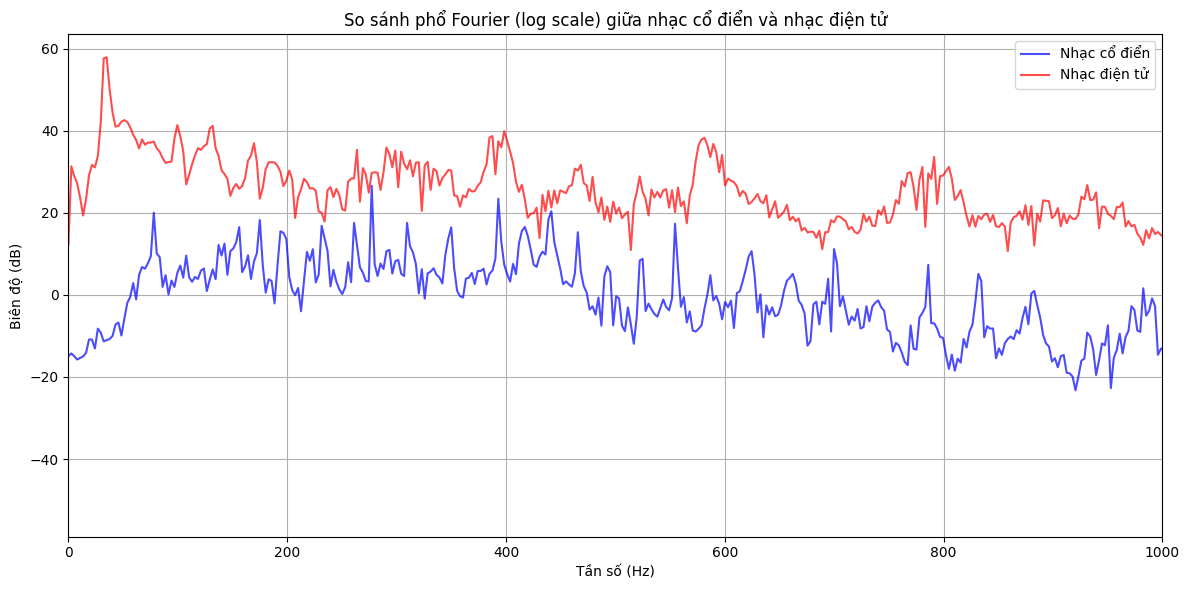

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(xf_classical, 20 * np.log10(yf_classical + 1e-6), label='Nhạc cổ điển', color='blue', alpha=0.7)
plt.plot(xf_electronic, 20 * np.log10(yf_electronic + 1e-6), label='Nhạc điện tử', color='red', alpha=0.7)
plt.title('So sánh phổ Fourier (log scale) giữa nhạc cổ điển và nhạc điện tử')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ (dB)')
plt.xlim(0, 1000)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


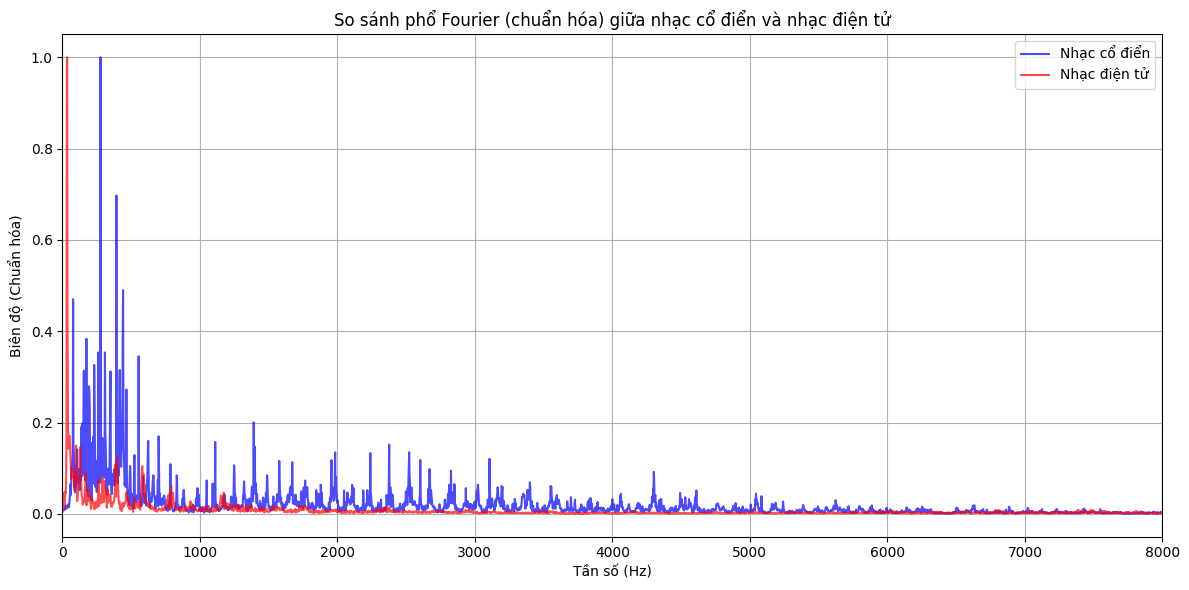

In [8]:
yf_classical_norm = yf_classical / np.max(yf_classical)
yf_electronic_norm = yf_electronic / np.max(yf_electronic)

plt.figure(figsize=(12, 6))
plt.plot(xf_classical, yf_classical_norm, label='Nhạc cổ điển', color='blue', alpha=0.7)
plt.plot(xf_electronic, yf_electronic_norm, label='Nhạc điện tử', color='red', alpha=0.7)
plt.title('So sánh phổ Fourier (chuẩn hóa) giữa nhạc cổ điển và nhạc điện tử')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ (Chuẩn hóa)')
plt.xlim(0, 8000)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


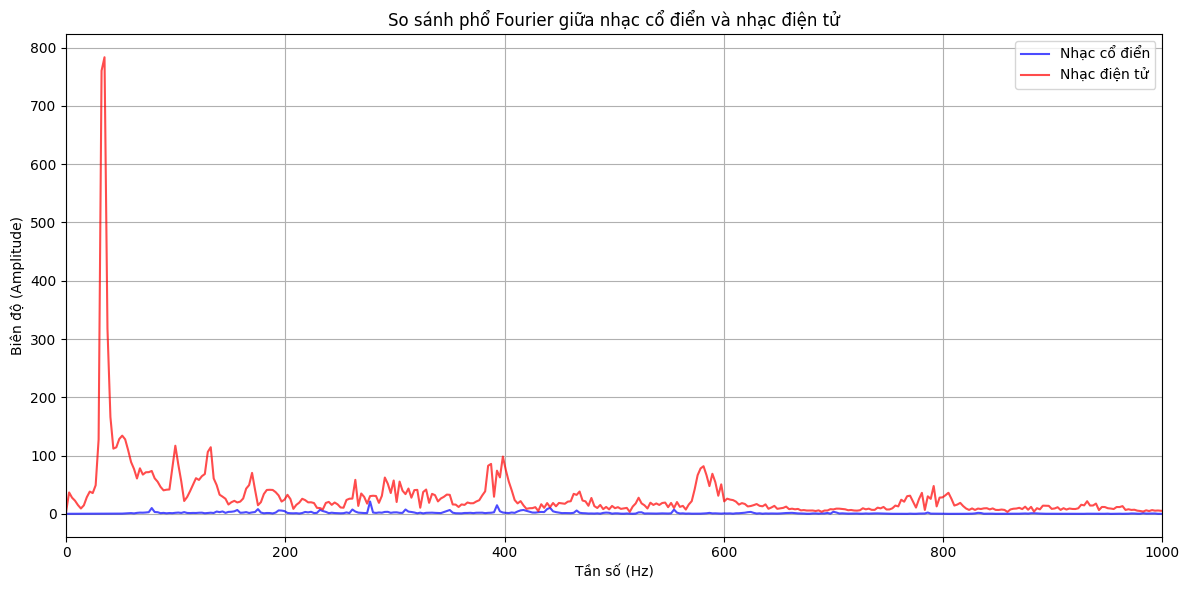

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(xf_classical, yf_classical, label='Nhạc cổ điển', color='blue', alpha=0.7)
plt.plot(xf_electronic, yf_electronic, label='Nhạc điện tử', color='red', alpha=0.7)
plt.title('So sánh phổ Fourier giữa nhạc cổ điển và nhạc điện tử')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ (Amplitude)')
plt.xlim(0, 1000)  # Chỉ phân tích dải nghe được rõ
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

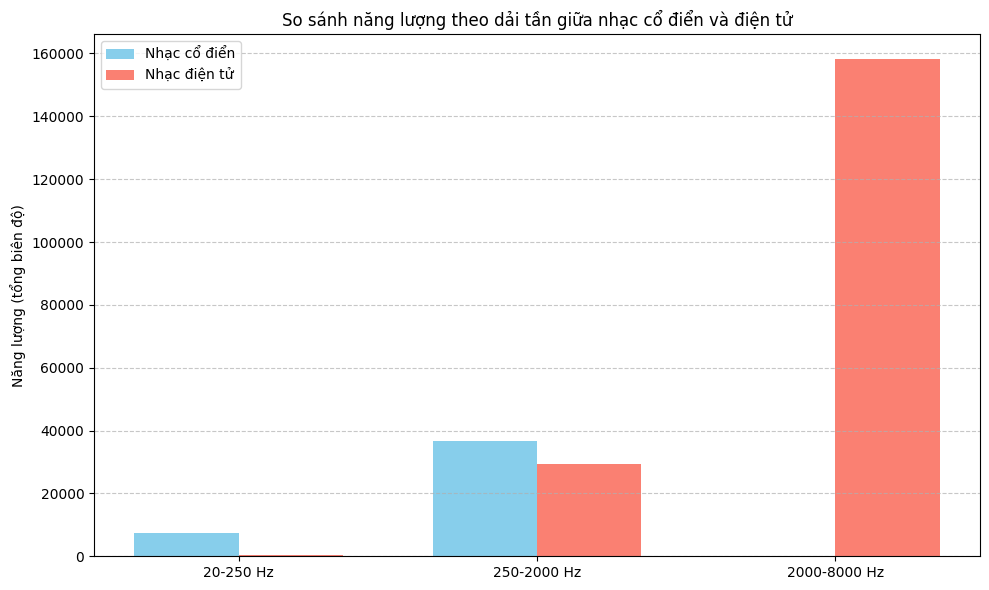

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Giả sử dữ liệu phổ (xf: tần số, yf: biên độ) cho nhạc cổ điển và nhạc điện tử
xf_classical = np.linspace(0, 10000, 5000)
xf_electronic = np.linspace(0, 10000, 5000)

# Tạo dữ liệu biên độ giả định (dạng phổ năng lượng)
yf_classical = np.exp(-((xf_classical - 500) ** 2) / (2 * (400 ** 2))) * 100
yf_electronic = np.exp(-((xf_electronic - 3000) ** 2) / (2 * (1000 ** 2))) * 150

# Hàm tính năng lượng theo dải tần
def band_energy(xf, yf, bands):
    energy = {}
    for (low, high) in bands:
        idx = np.where((xf >= low) & (xf < high))
        energy[(low, high)] = np.sum(yf[idx])
    return energy

# Các dải tần số cần tính năng lượng
bands = [(20, 250), (250, 2000), (2000, 8000)]

# Tính năng lượng theo từng dải
energy_classical = band_energy(xf_classical, yf_classical, bands)
energy_electronic = band_energy(xf_electronic, yf_electronic, bands)

# Chuẩn bị dữ liệu để vẽ biểu đồ
labels = [f"{low}-{high} Hz" for (low, high) in bands]
values_classical = [energy_classical[b] for b in bands]
values_electronic = [energy_electronic[b] for b in bands]

x = np.arange(len(bands))  # vị trí các cột
width = 0.35  # độ rộng của cột

# Vẽ biểu đồ so sánh năng lượng theo dải tần
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, values_classical, width, label='Nhạc cổ điển', color='skyblue')
bars2 = ax.bar(x + width/2, values_electronic, width, label='Nhạc điện tử', color='salmon')

# Gắn nhãn và tiêu đề
ax.set_ylabel('Năng lượng (tổng biên độ)')
ax.set_title('So sánh năng lượng theo dải tần giữa nhạc cổ điển và điện tử')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
